# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')

In [6]:
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
import pandas as pd

In [8]:
headers = html_soup.find_all('th')

In [9]:
data = html_soup.find_all('td')

In [10]:
mars_facts = {}
index = 0
for header in headers:
    keys = header.text
    mars_facts[keys] = []
    for x in data[index::len(headers)]:
        values = x.text
        mars_facts[keys].append(values)
    index = index + 1

In [11]:
print(mars_facts)

{'id': ['2', '13', '24', '35', '46', '57', '68', '79', '112', '114', '123', '134', '145', '156', '163', '170', '171', '172', '173', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '69', '70', '71', '72', '73', '74', '75', '76'

In [12]:
mars_df = pd.DataFrame(mars_facts)

In [13]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
mars_df = mars_df.astype({ 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})

In [16]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [17]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [19]:
# 1. How many months are there on Mars?
month_count = mars_df['month'].nunique()
month_count

12

In [20]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['sol'].count()
martian_days

1867

In [21]:
mars_months = mars_df.groupby('month', as_index=False).mean()

In [22]:
mars_months

,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


In [23]:
mars_months_df = pd.DataFrame(mars_months)
mars_months_df

,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


In [24]:
# mars_months_df['min_temp']*-1

<AxesSubplot:xlabel='month'>

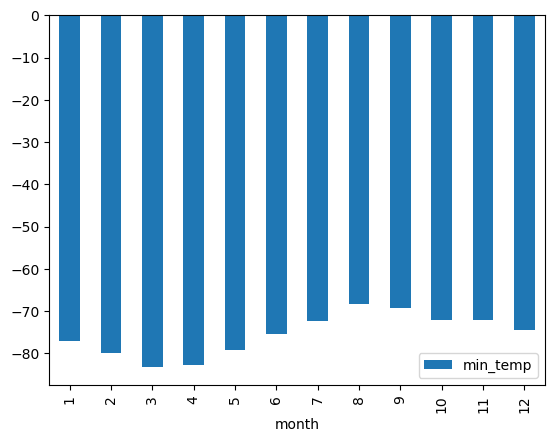

In [25]:
# 3. What is the average low temperature by month?

# plt.xlim(1, 12)
# plt.ylim(-87, -65) * -1


mars_months_df.plot.bar(x='month', y='min_temp')

# plt.xlim(1, 12)
#plt.ylim(87, 65)
#months1_df.plot.bar()

In [26]:
# Creating a copy of DF to make values positive to plot
# cmars_months_df = mars_months_df.copy()
# cmars_months_df

In [27]:
# cmars_months_df = abs(cmars_months_df)
# # cmars_months_df

In [28]:
# #inverted previous plot and made positive
# cmars_months_df.plot.bar(x='month', y='min_temp')

In [29]:
# Alternative answer for #3
months = mars_df.groupby('month')

low_temps = months['min_temp'].mean()

In [30]:
print(low_temps)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [31]:
low_temps_df = pd.DataFrame(low_temps)

In [32]:
low_temps_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<AxesSubplot:xlabel='month'>

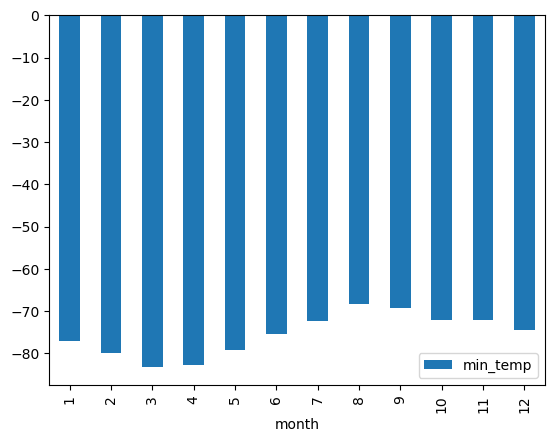

In [33]:
# Plot the average temperature by month
# plt.title("Average Minimum Temperatures on Mars")
# plt.xlabel("Months")
# plt.ylabel("Temperatures")

# plt.xlim(1, 12)
# plt.ylim(-87, -65)


low_temps_df.plot.bar()

In [34]:
mars_months_df

,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


<AxesSubplot:xlabel='month'>

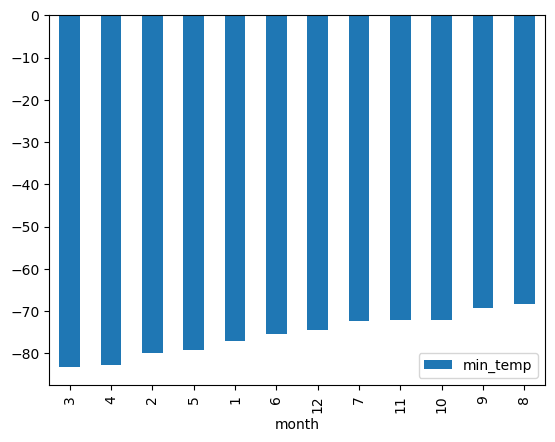

In [35]:
# Identify the coldest and hottest months in Curiosity's location

#Identify the coldest month

# print(mars_months_df.iloc[[-83.307292]])

# row=-83.307292
# display(mars_months_df.loc[row:row])

#mars_months_df.loc[mars_months_df['min_temp'] == low_temps_df.min()]

# coldest_avg_month = mars_months.iloc(3)
# coldest_avg_month

low_temps_df.sort_values(by=['min_temp']).plot.bar()

In [36]:
#identify coldest month - The Bar char above identifys months coldest to warmest.
coldest_avg_month = low_temps_df.min()
coldest_avg_month

min_temp   -83.307292
dtype: float64

In [37]:
#Identify the warmest month - The Bar char above identifys months coldest to warmest.

warmest_avg_month = low_temps_df.max()
warmest_avg_month

min_temp   -68.382979
dtype: float64

In [38]:
# 4. Average pressure by Martian month
months = mars_df.groupby('month')

avg_pressure = months['pressure'].mean()

print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [39]:
avg_pressure_df = pd.DataFrame(avg_pressure)
avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<AxesSubplot:xlabel='month'>

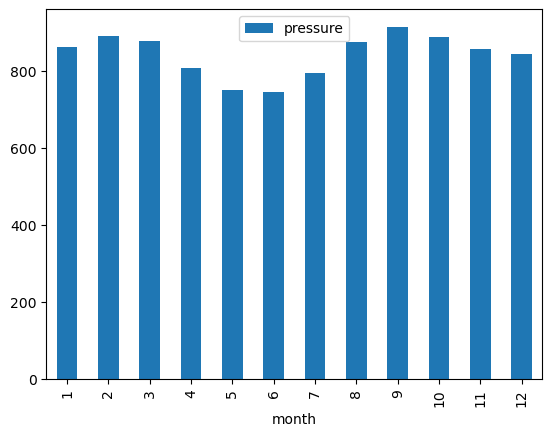

In [40]:
# Plot the average pressure by month
# plt.title("Average Pressure on Mars")
# plt.xlabel("Months")
# plt.ylabel("Pressure")
#plt.xticks(rotation=45)
avg_pressure_df.plot.bar()


In [41]:
# # 5. How many terrestrial (earth) days are there in a Martian year?
# lowest_temp = mars_df['min_temp'].min()
# lowest_temp

In [42]:
# lowest_temp = mars_df['min_temp'].min()
# lowest_temp

In [43]:
# x = mars_df.loc[mars_df['min_temp'] == -90, :]
# x

In [44]:
# mars_temps_df = pd.DataFrame(mars_temps)
# mars_temps_df

<AxesSubplot:xlabel='terrestrial_date', ylabel='min_temp'>

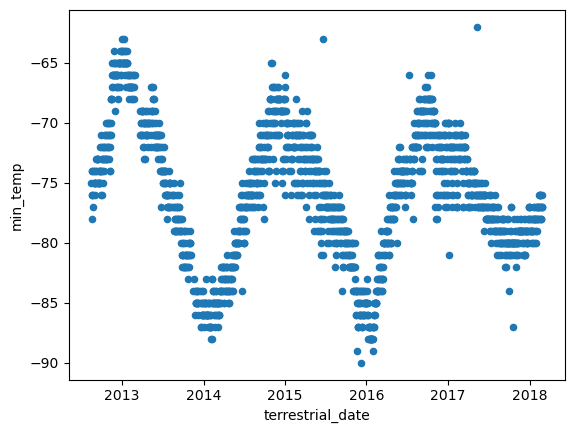

In [45]:
#The grapoh created below shows the peaks of Mars tempsgoing from coldest to warmets in a little less than 2 earth years.
mars_df.plot(kind = 'scatter', x = 'terrestrial_date', y = 'min_temp')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [46]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv')

In [48]:
browser.quit()